importing important libraries

In [1]:
import networkx as nx                                                  
import matplotlib.pyplot as plt
import networkx.algorithms.community as nx_comm
import random
import numpy as np
from itertools import accumulate

reading the data set with nx.read_edgelist() function

In [2]:
G=nx.read_edgelist('email-Eu-core.txt')
print(nx.info(G))

Graph with 1005 nodes and 16706 edges


C:\Users\Arijit Kundu\AppData\Local\Temp\ipykernel_6808\2284331274.py:2: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


A copy of the graph is created and using nx_comm.louvain_communities(H) we get the communities in the Graph and it returns a set so we store it inside community_set

In [3]:
H=nx.Graph(G)
community_set = nx_comm.louvain_communities(H)
print("there is ",len(community_set),"communities in Facebook Dataset")
print(community_set)

there is  28 communities in Facebook Dataset
[{'989', '627', '49', '757', '626', '300', '701', '105', '882', '752', '889', '62', '287', '962', '109', '78', '71', '144', '652', '186', '1003', '726', '606', '946', '821', '475', '371', '84', '972', '279', '837', '968', '491', '647', '467', '944', '325', '518', '107', '404', '153', '678', '969', '10', '418', '773', '642', '433', '50', '941', '212', '641', '597', '800', '877', '463', '162', '108', '783', '329', '431', '469', '187', '934', '831', '42', '145', '173', '364', '160', '460', '230', '787', '582', '87', '792', '298', '372', '508', '550', '288', '811', '453', '355', '513', '77', '778', '857', '643', '66', '282', '730', '509', '489', '111', '16', '497', '771', '549', '786', '624', '669', '249', '896', '654', '340', '422', '143', '999', '434', '828', '419', '536', '106', '667', '748', '356', '147', '163', '121', '471', '233', '578', '112', '70', '548', '83', '769', '615', '591', '559', '363', '69', '367', '892', '427', '462', '799', '

here the list of set is converted into list of list and it is converted into list of list

In [4]:
community_list = []
for j in community_set:
    community_list.append(list(j))
print(community_list)

[['989', '627', '49', '757', '626', '300', '701', '105', '882', '752', '889', '62', '287', '962', '109', '78', '71', '144', '652', '186', '1003', '726', '606', '946', '821', '475', '371', '84', '972', '279', '837', '968', '491', '647', '467', '944', '325', '518', '107', '404', '153', '678', '969', '10', '418', '773', '642', '433', '50', '941', '212', '641', '597', '800', '877', '463', '162', '108', '783', '329', '431', '469', '187', '934', '831', '42', '145', '173', '364', '160', '460', '230', '787', '582', '87', '792', '298', '372', '508', '550', '288', '811', '453', '355', '513', '77', '778', '857', '643', '66', '282', '730', '509', '489', '111', '16', '497', '771', '549', '786', '624', '669', '249', '896', '654', '340', '422', '143', '999', '434', '828', '419', '536', '106', '667', '748', '356', '147', '163', '121', '471', '233', '578', '112', '70', '548', '83', '769', '615', '591', '559', '363', '69', '367', '892', '427', '462', '799', '118', '577', '561', '253', '82', '189', '258'

K shell function is made to find out the community cores! cores at the end of the list are cores with higher degrees

In [5]:
def check(H,d):
    f = 0 
    for j in H:
        if (H.degree(j) <= d):
            f = 1
            break
    return f
  
def find_nodes(H, it):
    set1 = []
    for j in H:
        if (H.degree(j) <= it):
            set1.append(j)
    return set1
  
def k_shell(H):  
    it = 1
    tmp = []
    buckets = []
    while (1):
        flag = check(H, it)
        if (flag == 0):
            it += 1
            buckets.append(tmp)
            tmp = []
        if (flag == 1):
            node_set = find_nodes(H, it)
            for each in node_set:
                copy_graph.remove_node(each)
                tmp.append(each)
        if (H.number_of_nodes() == 0):
            buckets.append(tmp)
            return buckets
            break
               

here k-shell is applied and the community list of list is stored into list_core

In [6]:
copy_graph = nx.Graph(H)
list_core = []
k_com = nx.Graph()
other_com = nx.Graph()
for i in community_list:
    k_com = copy_graph.subgraph(i)
    k_core=k_shell(k_com)
    list_core.append((k_core))
print(list_core)

[[['626', '701', '1003', '606', '946', '972', '944', '941', '831', '787', '792', '999', '578', '561', '853', '779', '858', '780', '834'], ['882', '962', '821', '475', '969', '778', '857', '911', '891', '727', '966', '702', '958'], ['837', '773', '463', '934', '769', '704', '848', '890', '673', '984', '713', '620', '796'], ['989', '757', '752', '889', '109', '968', '800', '715', '739', '742', '906', '472', '799'], ['364', '624', '693', '539', '855'], ['877', '771', '786', '669', '512', '594'], ['652', '783', '811', '643', '730', '736', '476', '67', '952', '432', '954', '818', '540'], ['111', '410'], ['279', '647', '497', '471', '591', '559', '454', '465', '491'], ['298', '536', '892', '577', '110', '514'], ['678', '597', '117', '651'], ['627', '49'], ['726', '477', '541', '469'], ['71', '50', '112', '118', '445'], ['78', '144', '641', '582', '70', '950', '328', '217', '710', '433', '66', '431'], ['287', '679', '299', '90', '551', '896', '91'], ['325', '77', '462', '663', '79', '601'], [

storing the cores with Higher degree in a list called k_core_list and also the lengths of the cores are stored inside leng list

In [7]:
k_core_list = []
leng=[];
for i in list_core:
    length = len(i)-1
    k_core_list.append(i[length])       

for i in k_core_list:
    leng.append(len(i))

print(k_core_list)    
print(leng)

[['187', '419', '163', '427', '420', '531', '300', '42', '473', '495', '154', '184', '153', '147', '367', '546', '329', '233', '152', '254', '255', '932', '371', '404', '145', '173', '355', '340', '106', '474', '366', '81', '86', '105', '62', '518', '107', '212', '160', '87', '282', '249', '434', '121', '83', '82', '256', '283', '115', '333', '142', '166', '21', '424', '405'], ['334', '579', '335', '216', '164', '273', '139', '446', '45', '592', '461', '272', '269', '448', '46', '322', '428', '15', '140', '447', '429'], ['388', '380', '378', '385', '397', '150', '296', '320', '395', '387', '389', '104', '61', '103', '379', '181', '376', '60', '368', '393', '321', '250', '394', '157', '390', '295', '182'], ['570', '573', '971', '566', '407', '161', '362', '430', '823', '266', '421', '700', '720', '500', '707', '332', '608', '502', '699', '406', '441', '264', '856', '19', '12', '359', '661', '504', '569', '529', '506', '525', '9', '499', '44', '141', '7', '265', '358', '8', '11', '452', 

Defining a H_index function that returns H index of any list

In [8]:
def H_index(citations):
    citations.sort()
    for index, cited in enumerate(citations):
        result = len(citations) - index
        if result <= cited:
            return result
    return 0

defining a function that can return the H_index of any node's neighbours list's H_index

In [9]:
def Node_H_index(node):
    neig_list=G.neighbors(node)
    degree_list=[]
    for neighbour in neig_list:
        degree_list.append(G.degree(neighbour))
    h_index = H_index(degree_list)
    return h_index

defing a functiion that can return the Extended_h_index of a node

In [10]:
def Extended_H_index(node):
    h_index = Node_H_index(node)
    h_sum = 0
    for n in G.neighbors(node):
        h_sum = h_sum + Node_H_index(n)
    return h_index + h_sum

K core lists in every community and their extended H index

In [11]:
extended_list = []
new_extended_list=[]
rev_list=[]

for i in k_core_list:
    length=len(i)
    for j in i:
        extended_list.append(Extended_H_index(j))
print("K core list:",k_core_list)        
print("List of Extended H_index of cores:", extended_list )
new_extended_list = [extended_list[x - y: x] for x, y in zip(accumulate(leng), leng)]
print("Extended H_index of core_list:",new_extended_list)
print("Length of the cores in core_list:",leng)

K core list: [['187', '419', '163', '427', '420', '531', '300', '42', '473', '495', '154', '184', '153', '147', '367', '546', '329', '233', '152', '254', '255', '932', '371', '404', '145', '173', '355', '340', '106', '474', '366', '81', '86', '105', '62', '518', '107', '212', '160', '87', '282', '249', '434', '121', '83', '82', '256', '283', '115', '333', '142', '166', '21', '424', '405'], ['334', '579', '335', '216', '164', '273', '139', '446', '45', '592', '461', '272', '269', '448', '46', '322', '428', '15', '140', '447', '429'], ['388', '380', '378', '385', '397', '150', '296', '320', '395', '387', '389', '104', '61', '103', '379', '181', '376', '60', '368', '393', '321', '250', '394', '157', '390', '295', '182'], ['570', '573', '971', '566', '407', '161', '362', '430', '823', '266', '421', '700', '720', '500', '707', '332', '608', '502', '699', '406', '441', '264', '856', '19', '12', '359', '661', '504', '569', '529', '506', '525', '9', '499', '44', '141', '7', '265', '358', '8', 

Finding out max Extended h index values of the nodes and their indexes 

In [12]:
max_extended_h_index=[]
index_list=[]
for i in new_extended_list:
    max_extended_h_index.append(max(i))
    index_list.append(i.index(max(i)))

print("Maximum extended h indexes:",max_extended_h_index)
print("Their index value:",index_list)

Maximum extended h indexes: [12699, 3917, 3665, 4525, 2, 2, 2, 2, 2, 2, 4998, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 7773, 1754, 6718, 6888]
Their index value: [38, 12, 19, 34, 0, 0, 0, 0, 0, 0, 27, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 9, 27, 15]


Finally using the indexes we find out the cores

In [13]:
seed=[]
for x,y in zip(k_core_list,index_list):
    seed.append(x[y])
print(seed)

['160', '269', '393', '44', '580', '633', '648', '653', '658', '660', '17', '670', '675', '684', '691', '703', '711', '731', '732', '744', '746', '772', '798', '808', '183', '482', '211', '114']


Coppying the cores in a new list for safety

In [14]:
copy_seeds=[]
copy_seeds=seed.copy()
print(copy_seeds)
print(len(copy_seeds))

['160', '269', '393', '44', '580', '633', '648', '653', '658', '660', '17', '670', '675', '684', '691', '703', '711', '731', '732', '744', '746', '772', '798', '808', '183', '482', '211', '114']
28


all the seed nodes in decending order of Extended H index with their Extended H index values

In [15]:
my_dict={copy_seeds[i]: max_extended_h_index[i] for i in range(len(copy_seeds))}
# print(my_dict)
# print(my_dict.values())
sorted_dict={k: v for k,v in sorted(my_dict.items(), key = lambda v:v[1], reverse = True)}
print(sorted_dict)

{'160': 12699, '183': 7773, '114': 6888, '211': 6718, '17': 4998, '44': 4525, '269': 3917, '393': 3665, '482': 1754, '580': 2, '633': 2, '648': 2, '653': 2, '658': 2, '660': 2, '670': 2, '675': 2, '684': 2, '691': 2, '703': 2, '711': 2, '731': 2, '732': 2, '744': 2, '746': 2, '772': 2, '798': 2, '808': 2}


Independent Cascade Model Function

In [16]:
def ic(G, s, act_prbo):    
    jst_inf = s
    infected = s
    
    while(1):
        
        if len(jst_inf)==0:
            return infected
        else:
            temp=[]
            for each in jst_inf:
                for each1 in G.neighbors(each):
                    r=random.uniform(0,1)
                    if r<act_prbo and each1 not in infected and each1 not in temp:
                        temp.append(each1)
            for each1 in temp:
                infected.append(each1)
            jst_inf=temp

neighbours of the seed node is found

In [17]:
print("Seed nodes",copy_seeds)
seed_neighbour_list=[]
for i in copy_seeds:
    neighbour_list = [n for n in H.neighbors(i)]
    seed_neighbour_list.append(neighbour_list)
print(seed_neighbour_list)

Seed nodes ['160', '269', '393', '44', '580', '633', '648', '653', '658', '660', '17', '670', '675', '684', '691', '703', '711', '731', '732', '744', '746', '772', '798', '808', '183', '482', '211', '114']
[['2', '3', '4', '8', '10', '12', '15', '17', '18', '19', '20', '21', '23', '25', '27', '28', '29', '30', '35', '36', '40', '41', '42', '44', '45', '47', '51', '54', '55', '56', '57', '58', '59', '61', '63', '65', '66', '67', '68', '69', '78', '79', '80', '81', '82', '83', '84', '85', '87', '89', '90', '91', '92', '96', '103', '104', '105', '106', '107', '108', '113', '114', '115', '116', '117', '121', '123', '127', '128', '129', '130', '131', '132', '133', '135', '136', '137', '138', '139', '140', '141', '142', '143', '145', '146', '147', '148', '149', '150', '152', '153', '156', '158', '159', '161', '187', '190', '263', '405', '284', '300', '362', '180', '321', '319', '338', '504', '314', '367', '377', '280', '320', '478', '453', '249', '237', '165', '495', '233', '393', '467', '43

All the nodes are added in a single list,duplicate nodes are taken as single nodes

In [18]:
node_n_list=[]
for i in seed_neighbour_list:
    for j in i:
        
        node_n_list.append(j)
final_set=((set)(node_n_list))
final_list=list(final_set)
print(final_list)

['201', '73', '646', '281', '148', '35', '675', '845', '208', '250', '319', '592', '279', '809', '295', '25', '263', '392', '568', '573', '426', '401', '207', '971', '633', '820', '168', '695', '460', '364', '134', '983', '386', '854', '288', '40', '453', '355', '532', '734', '526', '513', '336', '857', '54', '482', '297', '732', '282', '322', '489', '16', '314', '746', '249', '444', '275', '636', '535', '494', '599', '422', '36', '347', '286', '434', '828', '419', '268', '339', '233', '658', '417', '30', '46', '193', '427', '555', '400', '393', '321', '755', '747', '394', '234', '663', '341', '13', '967', '807', '165', '429', '598', '609', '684', '686', '420', '195', '283', '243', '872', '181', '611', '362', '388', '473', '333', '68', '270', '437', '213', '255', '64', '48', '468', '130', '612', '833', '424', '101', '150', '81', '184', '86', '222', '405', '754', '232', '159', '300', '519', '767', '349', '105', '264', '287', '294', '499', '78', '925', '726', '822', '205', '44', '521', '

Candidate solution is found by deleting seed node's neighbours and adding it with seed nodes

In [19]:
Node_list=H.nodes()
rest_list=Node_list-final_list
candidate_solution=list(rest_list)+copy_seeds
candidate_solution = set(candidate_solution)
# print(candidate_solution)
candidate_solution = list(candidate_solution)
# print(candidate_solution)
print("Nodes left after deleting seed node's neighbours:",candidate_solution)
print("Core number:",len(candidate_solution))

Nodes left after deleting seed node's neighbours: ['650', '373', '887', '689', '626', '977', '558', '758', '596', '570', '109', '652', '675', '682', '926', '1000', '668', '837', '647', '102', '600', '781', '631', '864', '151', '642', '633', '463', '760', '175', '566', '33', '849', '883', '792', '875', '77', '398', '732', '482', '22', '893', '939', '746', '771', '94', '999', '456', '662', '936', '766', '901', '639', '578', '970', '658', '741', '886', '838', '728', '32', '674', '393', '244', '727', '750', '819', '31', '684', '907', '829', '704', '848', '858', '952', '803', '955', '903', '801', '840', '814', '739', '984', '836', '852', '841', '266', '595', '583', '712', '978', '843', '702', '414', '709', '713', '227', '789', '370', '796', '979', '523', '694', '479', '628', '817', '768', '330', '889', '962', '915', '844', '144', '241', '827', '965', '946', '707', '475', '574', '897', '972', '44', '491', '580', '622', '944', '953', '34', '745', '52', '50', '937', '488', '885', '850', '816',

First 10 among 16 seed nodes are taken

In [20]:
decending_seed_list=list(sorted_dict.keys())
adjustList = decending_seed_list.copy()
print(adjustList)
print(len(adjustList))
print(adjustList [0:10])

['160', '183', '114', '211', '17', '44', '269', '393', '482', '580', '633', '648', '653', '658', '660', '670', '675', '684', '691', '703', '711', '731', '732', '744', '746', '772', '798', '808']
28
['160', '183', '114', '211', '17', '44', '269', '393', '482', '580']


Final Calculation is done here,
For first 10 nodes, 10 nodes are taken from 16 seed nodes
For first 20 nodes, 16 from seed and rest from the highest Extended H index list and run ic model 20 times and avg is found
For first 30 nodes, 16 from seed and rest from the highest Extended H index list and run ic model 20 times and avg is found
For first 40 nodes, 16 from seed and rest from the highest Extended H index list and run ic model 20 times and avg is found
For first 50 nodes, 16 from seed and rest from the highest Extended H index list and run ic model 20 times and avg is found

In [21]:
def final_calculation(K):
    adjustList = decending_seed_list.copy()
    if K < len(community_list):
        decending_list = adjustList[0:K]
        print("Best ",len(decending_list)," are: ", decending_list)

        lenList=[]
        tempList=[]

        for i in range(20):
            tempList= ic(H,adjustList,0.5)
            print(i,end="-->")
            lenList.append(len(tempList))
        print("\n",lenList)

        average = sum(lenList)/len(lenList)
        return average
    
    else:
        candidateIndex_list = []
        for i in candidate_solution:
            candidateIndex_list.append(Extended_H_index(i))


        my_dict1={candidate_solution[i]: candidateIndex_list[i] for i in range(len(candidate_solution))}
        candidate_decending={k: v for k,v in sorted(my_dict1.items(), key = lambda v:v[1], reverse = True)}


        rest_nodes=list(candidate_decending.keys())
        temp3 = []
        for element in rest_nodes:
            if element not in adjustList:
                temp3.append(element)

        val = len(adjustList)
        op_list = adjustList + temp3[0 :(K - val)]

        print("Best ",len(op_list)," are: ", op_list)
        len1List=[]
        temp1List=[]

        for i in range(20):
            temp1List= ic(H,adjustList,0.5)
            print(i,end="-->")
            len1List.append(len(temp1List))
        print("\n",len1List)

        average1 = sum(len1List)/len(len1List)
        return average1

a new list is taken and given values 10,20,30,40,50

In [22]:
kList=[]

k1 = 10
k2 = 20
k3 = 30
k4 = 40
k5 = 50

kList.append(k1)
kList.append(k2)
kList.append(k3)
kList.append(k4)
kList.append(k5)

print(kList)

[10, 20, 30, 40, 50]


Final Calculation is Done here

In [23]:
valueList = []

v1 = final_calculation(10)
v2 = final_calculation(20)
v3 = final_calculation(30)
v4 = final_calculation(40)
v5 = final_calculation(50)

valueList.append(v1)
valueList.append(v2)
valueList.append(v3)
valueList.append(v4)
valueList.append(v5)

print(valueList)

Best  10  are:  ['160', '183', '114', '211', '17', '44', '269', '393', '482', '580']
0-->1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13-->14-->15-->16-->17-->18-->19-->
 [935, 979, 992, 998, 1002, 1004, 1004, 1004, 1005, 1005, 1005, 1005, 1005, 1005, 1005, 1005, 1005, 1005, 1005, 1005]
Best  20  are:  ['160', '183', '114', '211', '17', '44', '269', '393', '482', '580', '633', '648', '653', '658', '660', '670', '675', '684', '691', '703']
0-->1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13-->14-->15-->16-->17-->18-->19-->
 [945, 985, 997, 1001, 1004, 1004, 1004, 1004, 1004, 1005, 1005, 1005, 1005, 1005, 1005, 1005, 1005, 1005, 1005, 1005]
Best  30  are:  ['160', '183', '114', '211', '17', '44', '269', '393', '482', '580', '633', '648', '653', '658', '660', '670', '675', '684', '691', '703', '711', '731', '732', '744', '746', '772', '798', '808', '409', '167']
0-->1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13-->14-->15-->16-->17-->18-->19-->
 [937, 974, 995, 1001, 10

In [24]:
# plt.plot(kList,valueList, 'ro-')
# plt.xlabel('Number of Seed Nodes ')
# plt.ylabel('Number of Edge ')
# plt.title('Proposed model Graph')
# plt.show()

highest 50 nodes based on degree is found

In [25]:
#Degree
degreeDict={}
for node in G.nodes():
    degreeDict[node] = G.degree(node)
degree_decending = {k: v for k,v in sorted(degreeDict.items(), key = lambda v:v[1], reverse = True)}
# print(degree_decending)
keysD = []
valD = []
finalDlist = []
for vals in degree_decending.values():
    valD.append(vals)
for keys in degree_decending.keys():
    keysD.append(keys)

def Dcal(K):
    decendingD_list = keysD[0: K]
    print("Best ",len(decendingD_list)," are: ", decendingD_list)
    lenDList=[]
    tempDList=[]
    for i in range(20):
        tempDList= ic(H,decendingD_list,0.5)
        print(i,end="-->")
        lenDList.append(len(tempDList))
    print("\n",lenDList)
    averageD = sum(lenDList)/len(lenDList)
    return averageD

D1 = Dcal(10)
D2 = Dcal(20)
D3 = Dcal(30)
D4 = Dcal(40)
D5 = Dcal(50)

finalDlist.append(D1)
finalDlist.append(D2)
finalDlist.append(D3)
finalDlist.append(D4)
finalDlist.append(D5)


# plt.plot(kList,finalDlist, 'yo-')
# plt.xlabel('Number of Seed Nodes according to degree')
# plt.ylabel('Number of Edges')
# plt.show()

Best  10  are:  ['160', '121', '82', '107', '86', '62', '434', '13', '166', '183']
0-->1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13-->14-->15-->16-->17-->18-->19-->
 [928, 962, 977, 981, 983, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986]
Best  20  are:  ['160', '121', '82', '107', '86', '62', '434', '13', '166', '183', '5', '64', '249', '129', '533', '211', '105', '128', '106', '114']
0-->1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13-->14-->15-->16-->17-->18-->19-->
 [922, 956, 971, 982, 985, 985, 985, 985, 985, 985, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986]
Best  30  are:  ['160', '121', '82', '107', '86', '62', '434', '13', '166', '183', '5', '64', '249', '129', '533', '211', '105', '128', '106', '114', '283', '83', '142', '87', '377', '21', '420', '282', '333', '424']
0-->1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13-->14-->15-->16-->17-->18-->19-->
 [923, 957, 977, 981, 983, 986, 986, 986, 986, 986, 986, 986, 986, 986, 9

highest 50 nodes based on betweenness is found

In [26]:
#betweenness_centrality
betweenDict = nx.betweenness_centrality(G)
decBetweennessDict = {k: v for k,v in sorted(betweenDict.items(), key = lambda v:v[1], reverse = True)}
# print(decBetweennessDict)
keysB = []
valsB = []
finalB_val = []
for i in decBetweennessDict.keys():
    keysB.append(i)
for j in decBetweennessDict.values():
    valsB.append(j)


def BCcal(K):
    decendingBC_list = keysB[0: K]
    print("Best ",len(decendingBC_list)," are: ", decendingBC_list)
    lenBCList=[]
    tempBCList=[]
    for i in range(20):
        tempBCList= ic(H,decendingBC_list,0.5)
        print(i,end="-->")
        lenBCList.append(len(tempBCList))
    print("\n",lenBCList)
    averageBC = sum(lenBCList)/len(lenBCList)
    return averageBC

BC1 = BCcal(10)
BC2 = BCcal(20)
BC3 = BCcal(30)
BC4 = BCcal(40)
BC5 = BCcal(50)

finalB_val.append(BC1)
finalB_val.append(BC2)
finalB_val.append(BC3)
finalB_val.append(BC4)
finalB_val.append(BC5)


# plt.plot(kList,finalB_val, 'bo-')
# plt.xlabel('Number of Seed Nodes according to Betweeness ')
# plt.ylabel('Number of Edges')
# plt.show()

Best  10  are:  ['160', '86', '5', '82', '121', '107', '13', '377', '62', '64']
0-->1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13-->14-->15-->16-->17-->18-->19-->
 [924, 959, 973, 982, 985, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986]
Best  20  are:  ['160', '86', '5', '82', '121', '107', '13', '377', '62', '64', '211', '533', '84', '166', '971', '434', '411', '129', '65', '6']
0-->1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13-->14-->15-->16-->17-->18-->19-->
 [919, 956, 972, 981, 985, 985, 985, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986]
Best  30  are:  ['160', '86', '5', '82', '121', '107', '13', '377', '62', '64', '211', '533', '84', '166', '971', '434', '411', '129', '65', '6', '183', '333', '301', '96', '21', '820', '44', '249', '106', '128']
0-->1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13-->14-->15-->16-->17-->18-->19-->
 [916, 959, 973, 981, 982, 985, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986, 98

highest 50 nodes based on page rank is found

In [27]:
#pagerank_numpy
page_rank = nx.pagerank_numpy(H)
decendingPR = {k: v for k,v in sorted(page_rank.items(), key = lambda v:v[1], reverse = True)}
# print(decendingPG)

keysPR = []
valuesPR = []
for i in decendingPR.keys():
    keysPR.append(i)
for j in decendingPR.values():
    valuesPR.append(j)

finalPR=[]

def PRcal(K):
    decendingPR_list = keysPR[0: K]
    print("Best ",len(decendingPR_list)," are: ", decendingPR_list)
    lenPRList=[]
    tempPRList=[]
    for i in range(20):
        tempPRList= ic(H,decendingPR_list,0.5)
        print(i,end="-->")
        lenPRList.append(len(tempPRList))
    print("\n",lenPRList)
    averagePR = sum(lenPRList)/len(lenPRList)
    return averagePR

PR1 = PRcal(10)
PR2 = PRcal(20)
PR3 = PRcal(30)
PR4 = PRcal(40)
PR5 = PRcal(50)

finalPR.append(PR1)
finalPR.append(PR2)
finalPR.append(PR3)
finalPR.append(PR4)
finalPR.append(PR5)

# plt.plot(kList,finalPR)
# plt.xlabel('Number of Seed Nodes according to Pagerank')
# plt.ylabel('Number of Edges')
# plt.show()

C:\Users\Arijit Kundu\AppData\Local\Temp\ipykernel_6808\3286579759.py:2: DeprecationWarning: networkx.pagerank_numpy is deprecated and will be removed in NetworkX 3.0, use networkx.pagerank instead.
  page_rank = nx.pagerank_numpy(H)
C:\Users\Arijit Kundu\Anaconda3\lib\site-packages\networkx\algorithms\link_analysis\pagerank_alg.py:354: FutureWarning: google_matrix will return an np.ndarray instead of a np.matrix in
NetworkX version 3.0.
  M = google_matrix(


Best  10  are:  ['160', '121', '82', '107', '86', '62', '5', '13', '166', '434']
0-->1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13-->14-->15-->16-->17-->18-->19-->
 [907, 949, 965, 976, 980, 983, 984, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986]
Best  20  are:  ['160', '121', '82', '107', '86', '62', '5', '13', '166', '434', '377', '64', '211', '183', '129', '249', '533', '84', '21', '128']
0-->1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13-->14-->15-->16-->17-->18-->19-->
 [925, 962, 973, 981, 982, 983, 984, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986]
Best  30  are:  ['160', '121', '82', '107', '86', '62', '5', '13', '166', '434', '377', '64', '211', '183', '129', '249', '533', '84', '21', '128', '106', '283', '105', '114', '87', '420', '333', '83', '142', '282']
0-->1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13-->14-->15-->16-->17-->18-->19-->
 [927, 967, 977, 983, 985, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986, 9

highest 50 nodes based on H-index is found

In [28]:
#H-index
HindexDegree = {}
decHindexDegree = {}
for nodes in G.nodes():
    HindexDegree[nodes] = Node_H_index(nodes)
# print(ExtendedDegree)
decHindexDegree = {k: v for k,v in sorted(HindexDegree.items(), key = lambda v:v[1], reverse = True)}
# print(decExtended)

keysH = []
valuesH = []
for i in decHindexDegree.keys():
    keysH.append(i)
for j in decHindexDegree.values():
    valuesH.append(j)
finalH=[]

def Hcal(K):
    decHindexDegree = keysH[0: K]
    print("Best ",len(decHindexDegree)," are: ", decHindexDegree)
    lenHList=[]
    tempHList=[]
    for i in range(20):
        tempHList= ic(H,decHindexDegree,0.5)
        print(i,end="-->")
        lenHList.append(len(tempHList))
    print("\n",lenHList)
    averageH = sum(lenHList)/len(lenHList)
    return averageH

H1 = Hcal(10)
H2 = Hcal(20)
H3 = Hcal(30)
H4 = Hcal(40)
H5 = Hcal(50)

finalH.append(H1)
finalH.append(H2)
finalH.append(H3)
finalH.append(H4)
finalH.append(H5)

# plt.plot(kList,finalH)
# plt.xlabel('Number of Seed Nodes according to H index')
# plt.ylabel('Number of Edges')
# plt.show()

Best  10  are:  ['82', '121', '107', '62', '160', '249', '434', '128', '129', '114']
0-->1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13-->14-->15-->16-->17-->18-->19-->
 [911, 951, 969, 978, 983, 984, 985, 985, 985, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986]
Best  20  are:  ['82', '121', '107', '62', '160', '249', '434', '128', '129', '114', '183', '87', '105', '166', '212', '21', '83', '106', '283', '81']
0-->1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13-->14-->15-->16-->17-->18-->19-->
 [917, 956, 969, 979, 983, 983, 984, 985, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986]
Best  30  are:  ['82', '121', '107', '62', '160', '249', '434', '128', '129', '114', '183', '87', '105', '166', '212', '21', '83', '106', '283', '81', '86', '142', '169', '256', '115', '211', '333', '64', '405', '282']
0-->1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13-->14-->15-->16-->17-->18-->19-->
 [924, 961, 973, 981, 983, 986, 986, 986, 986, 986, 986, 986, 986, 9

highest 50 nodes based on Extended H index is found

In [29]:
#Extended H Index
ExtendedHDegree = {}
decExtendedH = {}
for nodes in G.nodes():
    ExtendedHDegree[nodes] = Extended_H_index(nodes)
decExtendedH = {k: v for k,v in sorted(ExtendedHDegree.items(), key = lambda v:v[1], reverse = True)}

keysEH = []
valuesEH = []
for i in decExtendedH.keys():
    keysEH.append(i)
for j in decExtendedH.values():
    valuesEH.append(j)
finalEH=[]

def EHcal(K):
    decExtendedH = keysEH[0: K]
    print("Best ",len(decExtendedH)," are: ", decExtendedH)
    lenEHList=[]
    tempEHList=[]
    for i in range(20):
        tempEHList= ic(H,decExtendedH,0.5)
        print(i,end="-->")
        lenEHList.append(len(tempEHList))
    print("\n",lenEHList)
    averageEH = sum(lenEHList)/len(lenEHList)
    return averageEH

EH1 = EHcal(10)
EH2 = EHcal(20)
EH3 = EHcal(30)
EH4 = EHcal(40)
EH5 = EHcal(50)

finalEH.append(EH1)
finalEH.append(EH2)
finalEH.append(EH3)
finalEH.append(EH4)
finalEH.append(EH5)

# plt.plot(kList,finalEH)
# plt.xlabel('Number of Seed Nodes according to Extended H index')
# plt.ylabel('Number of Edges')
# plt.show()

Best  10  are:  ['160', '121', '82', '107', '62', '434', '86', '249', '183', '166']
0-->1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13-->14-->15-->16-->17-->18-->19-->
 [920, 949, 969, 980, 984, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986]
Best  20  are:  ['160', '121', '82', '107', '62', '434', '86', '249', '183', '166', '129', '105', '128', '114', '283', '13', '64', '87', '211', '142']
0-->1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13-->14-->15-->16-->17-->18-->19-->
 [918, 961, 973, 979, 983, 984, 985, 985, 985, 985, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986]
Best  30  are:  ['160', '121', '82', '107', '62', '434', '86', '249', '183', '166', '129', '105', '128', '114', '283', '13', '64', '87', '211', '142', '83', '106', '533', '256', '115', '282', '21', '424', '333', '212']
0-->1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13-->14-->15-->16-->17-->18-->19-->
 [931, 962, 973, 984, 985, 986, 986, 986, 986, 986, 986, 986, 986, 98

Final graph plotting

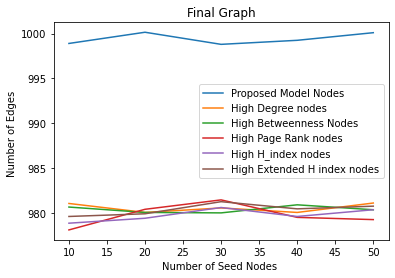

In [30]:
plt.plot(kList,valueList,label='Proposed Model Nodes')
plt.plot(kList,finalDlist, label='High Degree nodes')
plt.plot(kList,finalB_val, label='High Betweenness Nodes')
plt.plot(kList,finalPR, label='High Page Rank nodes')
plt.plot(kList,finalH, label='High H_index nodes')
plt.plot(kList,finalEH, label='High Extended H index nodes')


plt.xlabel('Number of Seed Nodes ')
plt.ylabel('Number of Edges ')
plt.title('Final Graph')
plt.legend()
plt.show()